<a href="https://colab.research.google.com/github/GoPackers/NU422/blob/master/Titanic_Playing_with_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playing with Titanic Dataset - Week 1

#### Import packages needed

In [2]:
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
print ('All done importing')

from google.colab import files


All done importing


In [4]:
uploaded = files.upload()

In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [18]:
df = pd.read_csv('train.csv')
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.describe().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Survived</th>\n      <th>Pclass</th>\n      <th>Age</th>\n      <th>SibSp</th>\n      <th>Parch</th>\n      <th>Fare</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>891.000000</td>\n      <td>891.000000</td>\n      <td>714.000000</td>\n      <td>891.000000</td>\n      <td>891.000000</td>\n      <td>891.000000</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>0.383838</td>\n      <td>2.308642</td>\n      <td>29.699118</td>\n      <td>0.523008</td>\n      <td>0.381594</td>\n      <td>32.204208</td>\n    </tr>\n    <tr>\n      <th>std</th>\n      <td>0.486592</td>\n      <td>0.836071</td>\n      <td>14.526497</td>\n      <td>1.102743</td>\n      <td>0.806057</td>\n      <td>49.693429</td>\n    </tr>\n    <tr>\n      <th>min</th>\n      <td>0.000000</td>\n      <td>1.000000</td>\n      <td>0.420000</td>\n      <td>0.000000</td>\n      <

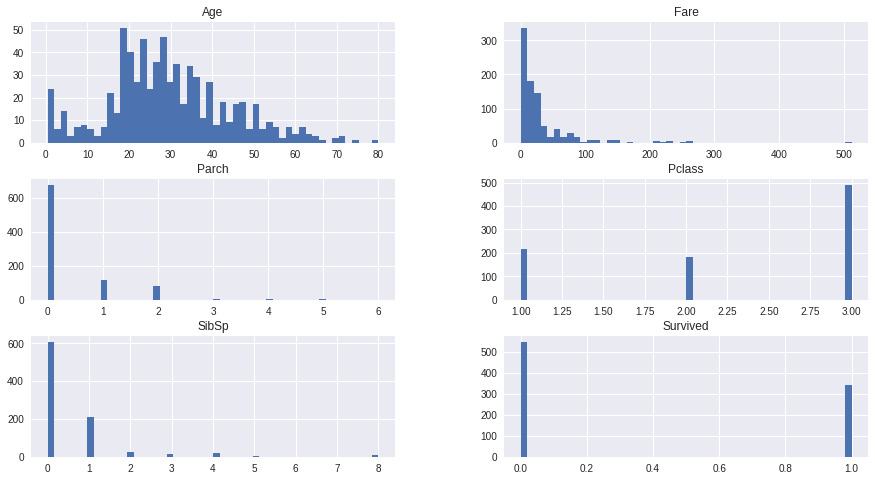

In [20]:
df.hist(bins = 50,figsize=(15,8))
plt.savefig('histo.png')

In [21]:
df2 = df[['Survived', 'Sex', 'Embarked']]
df2.describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:

df2g = df2.groupby('Embarked').Survived.sum()
df2g

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

From Kaggle:  embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [24]:
df3 = df2.groupby('Embarked').Survived.count()
df3

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [25]:
Cherbough_Survival_Rate = df2g[0]/df3[0]
Cherbough_Survival_Rate

0.5535714285714286

In [26]:
Queenstown_Survival_Rate = df2g[1]/df3[1]
Queenstown_Survival_Rate

0.38961038961038963

In [27]:
Southampton_Survival_Rate = df2g[2]/df3[2]
Southampton_Survival_Rate

0.33695652173913043

### Now let's play with another subset of the data -- just the people who had a cabin

It was interesting to see that the survivor rate was higher -- mean of 66% vs. 38% for the entire training set with similar std deviation.  Of course, the fare price for these people was higher.  

In [0]:
dfCab = df.dropna(subset = ['Cabin'])

In [29]:
dfCab.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,185.000000,204.000000,204.000000,204.000000
mean,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
std,0.472564,0.525961,15.679356,0.628918,0.729976,74.391749
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.453125
50%,1.000000,1.000000,36.000000,0.000000,0.000000,55.220850
75%,1.000000,1.000000,48.000000,1.000000,1.000000,89.328150
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


add .to_html to get HTML code to paste into canvas:

In [30]:
dfCab.describe().to_html()


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Survived</th>\n      <th>Pclass</th>\n      <th>Age</th>\n      <th>SibSp</th>\n      <th>Parch</th>\n      <th>Fare</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>204.000000</td>\n      <td>204.000000</td>\n      <td>185.000000</td>\n      <td>204.000000</td>\n      <td>204.000000</td>\n      <td>204.000000</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>0.666667</td>\n      <td>1.196078</td>\n      <td>35.829297</td>\n      <td>0.441176</td>\n      <td>0.436275</td>\n      <td>76.141504</td>\n    </tr>\n    <tr>\n      <th>std</th>\n      <td>0.472564</td>\n      <td>0.525961</td>\n      <td>15.679356</td>\n      <td>0.628918</td>\n      <td>0.729976</td>\n      <td>74.391749</td>\n    </tr>\n    <tr>\n      <th>min</th>\n      <td>0.000000</td>\n      <td>1.000000</td>\n      <td>0.920000</td>\n      <td>0.000000</td>\n      <

I thought it was interesting that the survivor rates are higher for people with cabins